In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") 

plt.style.use('fivethirtyeight') 

In [47]:
path = r'C:\Users\goswa\Desktop\Pratham project folder 6'

In [48]:
df_UFC = pd.read_csv(r'C:\Users\goswa\Desktop\Pratham project folder 6\Prepared data\UFC_Clean.csv', index_col = False)

In [49]:
df_UFC.shape

(4540, 38)

In [50]:
%matplotlib inline

In [51]:
df_UFC.head()

,Unnamed: 0,r_fighter,b_fighter,fight_date,city,state,country,winner,win_all,weight_class,...,r_win_by_decision_unanimous,r_win_by_ko/tko,r_win_by_submission,r_win_by_tko_doctor_stoppage,r_stance,r_height_cms,r_Reach_cms,r_weight_lbs,b_age,r_age
0,0,Adrian Yanez,Gustavo Lopez,3/20/2021,Las Vegas,Nevada,United States of America,Red,1,Bantamweight,...,0,1,0,0,Orthodox,170.18,177.80,135,31,27
1,1,Trevin Giles,Roman Dolidze,3/20/2021,Las Vegas,Nevada,United States of America,Red,2,Middleweight,...,0,3,0,0,Orthodox,182.88,187.96,185,32,28
2,2,Tai Tuivasa,Harry Hunsucker,3/20/2021,Las Vegas,Nevada,United States of America,Red,0,Heavyweight,...,1,3,0,0,Southpaw,187.96,190.50,264,32,28
3,3,Cheyanne Buys,Montserrat Conejo,3/20/2021,Las Vegas,Nevada,United States of America,Blue,0,WomenStrawweight,...,0,0,0,0,Switch,160.02,160.02,115,28,25
4,4,Marion Reneau,Macy Chiasson,3/20/2021,Las Vegas,Nevada,United States of America,Blue,4,WomenBantamweight,...,1,2,2,0,Orthodox,167.64,172.72,135,29,43


In [52]:
data_types = {'fight_date': 'datetime64'}

In [53]:
file_path = os.path.join(path, 'Prepared data','UFC_Clean.csv')

In [54]:
parse_dates = ['fight_date']

In [55]:
df_UFC = pd.read_csv(file_path, parse_dates=parse_dates)

In [56]:
df_UFC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4540 entries, 0 to 4539
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Unnamed: 0                    4540 non-null   int64         
 1   r_fighter                     4540 non-null   object        
 2   b_fighter                     4540 non-null   object        
 3   fight_date                    4540 non-null   datetime64[ns]
 4   city                          4540 non-null   object        
 5   state                         4540 non-null   object        
 6   country                       4540 non-null   object        
 7   winner                        4540 non-null   object        
 8   win_all                       4540 non-null   int64         
 9   weight_class                  4540 non-null   object        
 10  B_Past_wins                   4540 non-null   int64         
 11  B_Past_losses                 

# My rationale for selecting the data was to examine the historical growth patterns of UFC fights over both daily and yearly increments. Additionally, I aimed to identify specific dates or noteworthy events that have influenced this growth over the years.

In [57]:
day_counts = df_UFC.groupby( df_UFC['fight_date'].dt.date)['fight_date'].count()

In [58]:
day_counts

fight_date
1997-10-17     1
1999-03-05     1
2001-02-23     3
2001-05-04     1
2001-06-29     1
              ..
2021-02-20    11
2021-02-27     9
2021-03-06    15
2021-03-13    13
2021-03-20     9
Name: fight_date, Length: 482, dtype: int64

In [59]:
sum_fights_held_day = df_UFC.groupby('fight_date')['win_all'].sum()

In [61]:
sum_fights_held_day

fight_date
1997-10-17     3
1999-03-05     1
2001-02-23     7
2001-05-04     0
2001-06-29     1
              ..
2021-02-20    27
2021-02-27    25
2021-03-06    64
2021-03-13    36
2021-03-20    23
Name: win_all, Length: 482, dtype: int64

In [62]:
result = pd.DataFrame({'date': day_counts.index, 'sum_fights': sum_fights_held_day.values})

In [63]:
result

,date,sum_fights
0,1997-10-17,3
1,1999-03-05,1
2,2001-02-23,7
3,2001-05-04,0
4,2001-06-29,1
...,...,...
477,2021-02-20,27
478,2021-02-27,25
479,2021-03-06,64
480,2021-03-13,36


In [64]:
# Set the "Date" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['date']) 
result = result.set_index('datetime') 
result.drop(['date'], axis=1, inplace=True) 
result.head()

,sum_fights
datetime,
1997-10-17,3
1999-03-05,1
2001-02-23,7
2001-05-04,0
2001-06-29,1


In [65]:
df_UFC = result.reset_index()

In [66]:
df_UFC.head()

,datetime,sum_fights
0,1997-10-17,3
1,1999-03-05,1
2,2001-02-23,7
3,2001-05-04,0
4,2001-06-29,1


In [67]:
# Set datetime as index.

from datetime import datetime
df_UFC = df_UFC.set_index('datetime')  # Set the datetime as the index of the dataframe.\n",
df_UFC.head()

,sum_fights
datetime,
1997-10-17,3
1999-03-05,1
2001-02-23,7
2001-05-04,0
2001-06-29,1


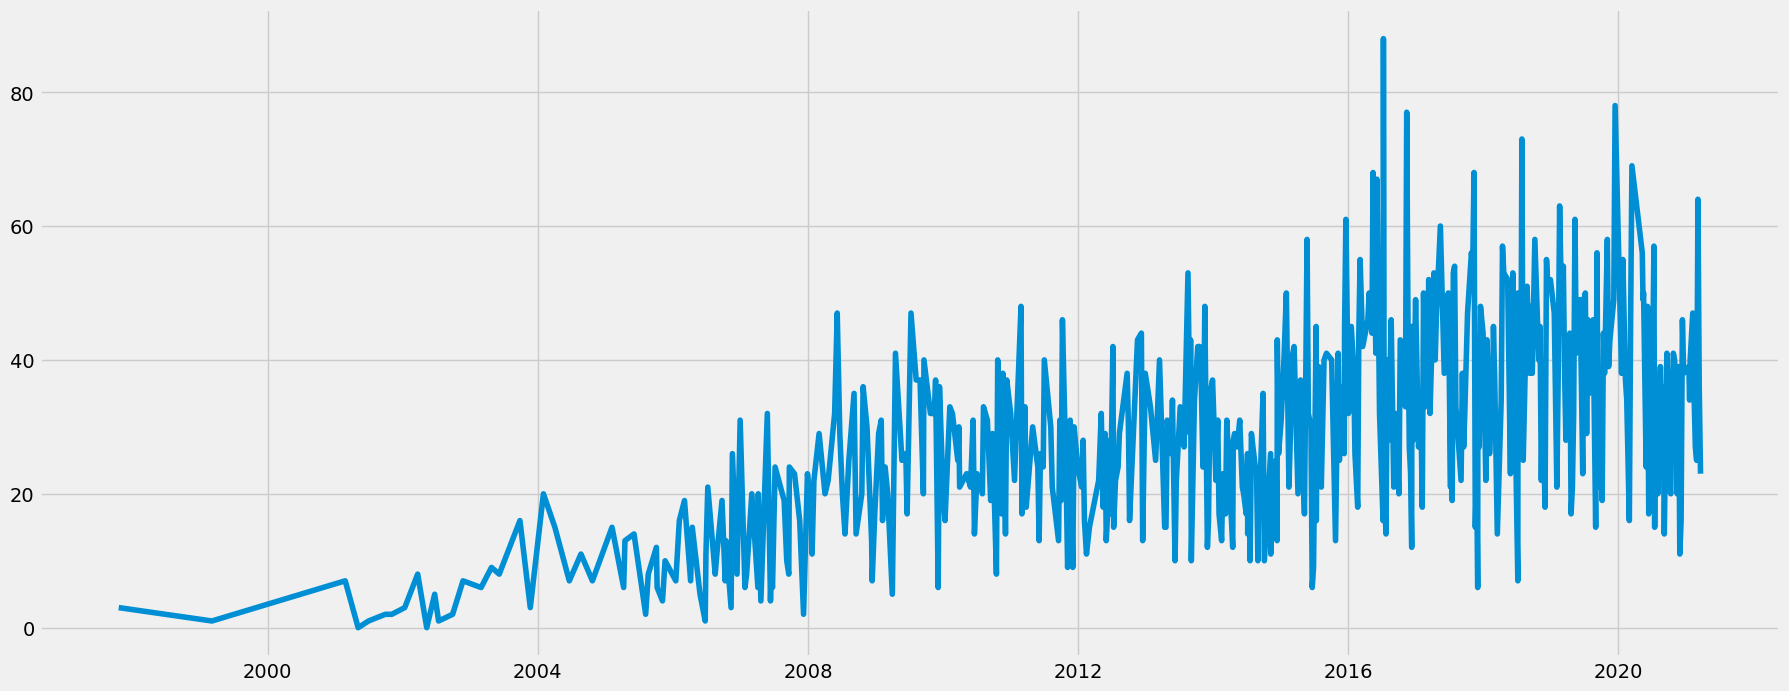

In [68]:
plt.figure(figsize=(20,8), dpi=100) 
    

plt.plot(df_UFC)


In [69]:
df_UFC.isnull().sum()

sum_fights    0
dtype: int64

In [70]:
# Decompose time series using additive model

decomposition = sm.tsa.seasonal_decompose(df_UFC, model='additive', period=1)

In [73]:
from pylab import rcParams # define fixed size for special charts.\n",

rcParams['figure.figsize'] = 18, 8

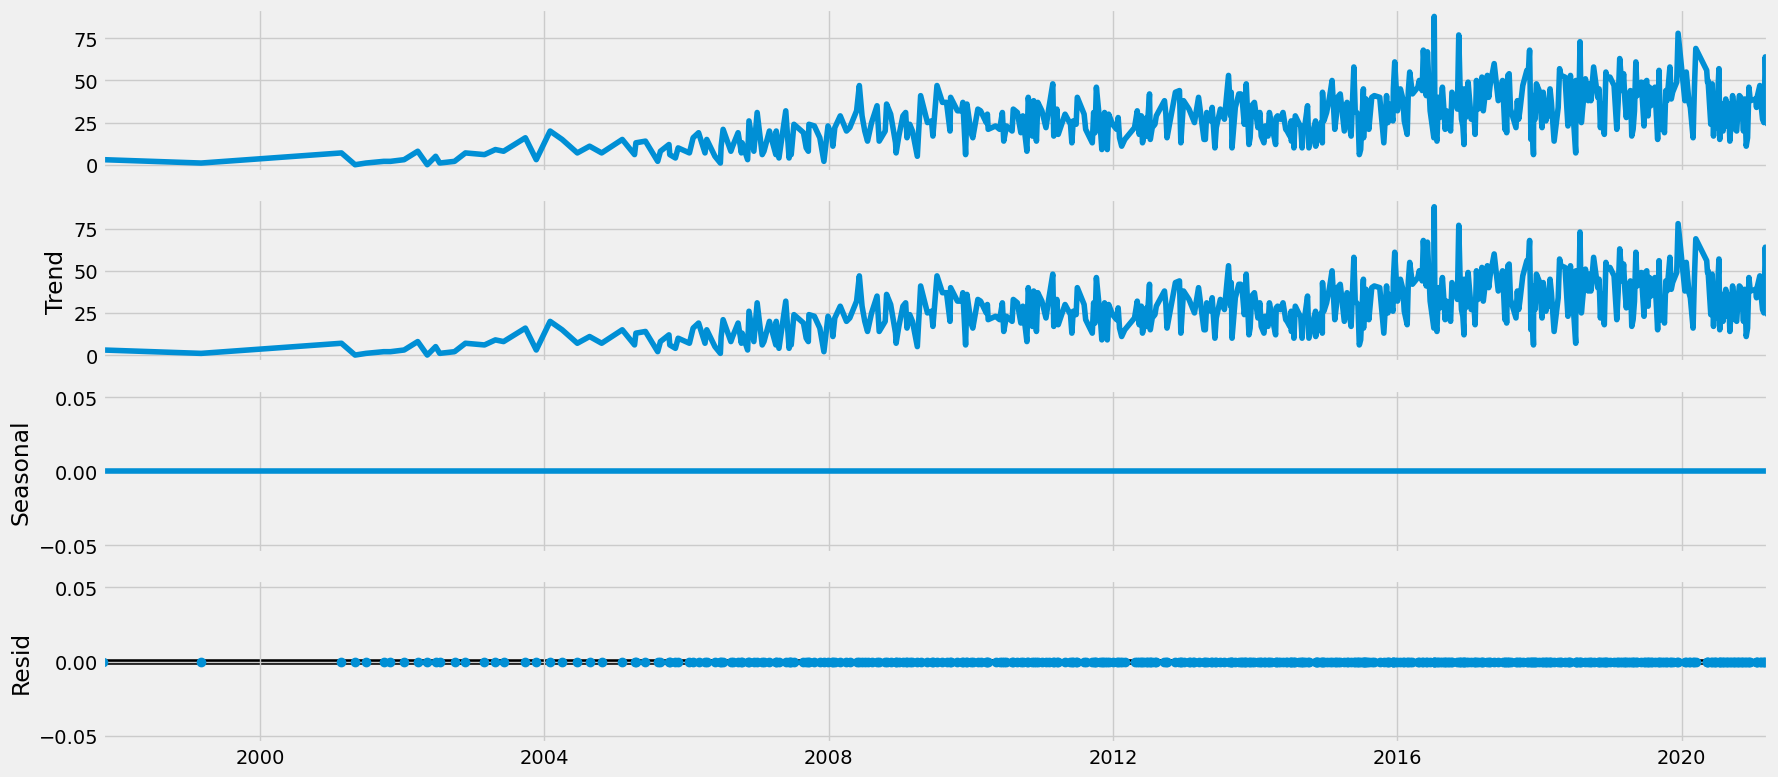

In [74]:

decomposition.plot()
plt.show()

The data reveals no discernible seasonal pattern, indicating a continual rise in UFC fights over the years, suggesting increased awareness and marketing. However, the spike in 2016 remains unexplained and may be attributed to special events, requiring further analysis for clarity.

In [75]:
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_UFC['sum_fights'])

Dickey-Fuller Stationarity test:
Test Statistic                  -2.549148
p-value                          0.103969
Number of Lags Used             18.000000
Number of Observations Used    463.000000
Critical Value (1%)             -3.444553
Critical Value (5%)             -2.867803
Critical Value (10%)            -2.570106
dtype: float64


The 10% critical value is more than the test statistic so we can reject the null indicating it is stationary.A p-value less than or equal to  0.05 or 0.01 indicates a statistically significant result however the p value is much larger



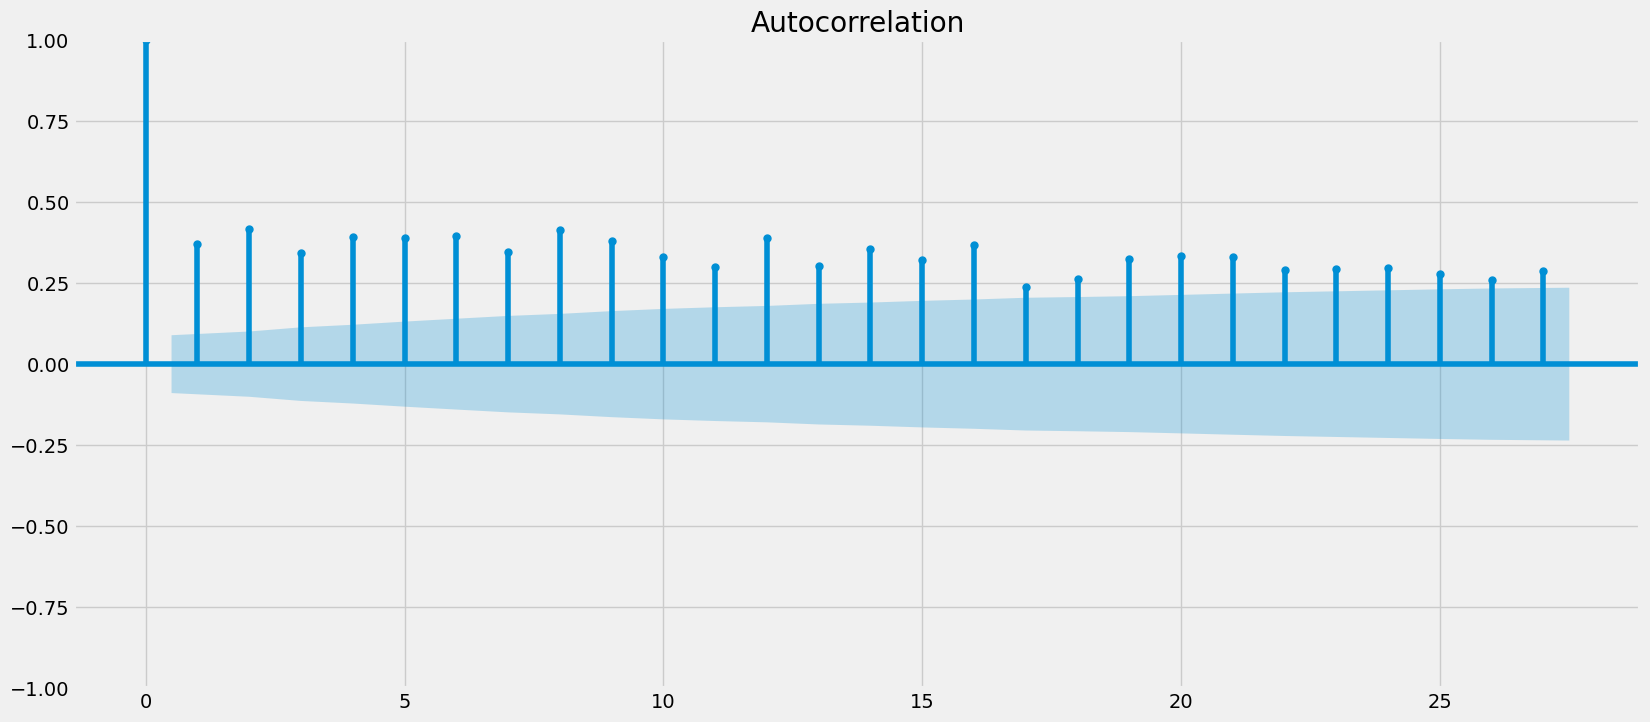

In [76]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_UFC)
plt.show()

Numerous lags extend beyond the confidence interval edge, signifying significant correlation among them.

# Run round of differencing 

In [78]:
data_diff = df_UFC - df_UFC.shift(1) #The utilization of the df.shift(1) function transforms the observation to t-1, effectively representing the difference as t - (t - 1).

In [79]:
data_diff.dropna(inplace = True)

In [80]:
data_diff.head()

,sum_fights
datetime,
1999-03-05,-2.0
2001-02-23,6.0
2001-05-04,-7.0
2001-06-29,1.0
2001-09-28,1.0


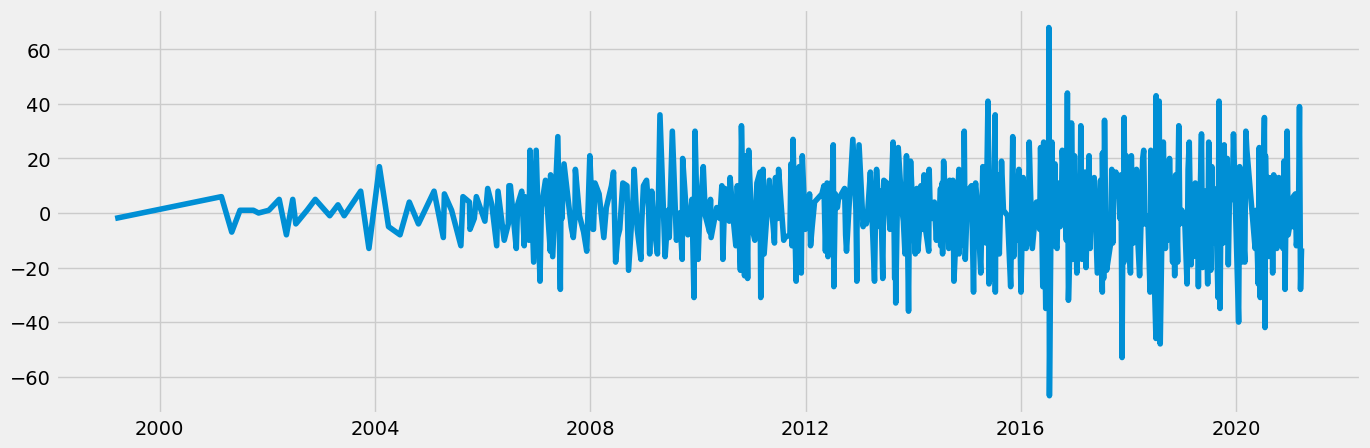

In [81]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [82]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.310244e+00
p-value                        1.269929e-10
Number of Lags Used            1.700000e+01
Number of Observations Used    4.630000e+02
Critical Value (1%)           -3.444553e+00
Critical Value (5%)           -2.867803e+00
Critical Value (10%)          -2.570106e+00
dtype: float64


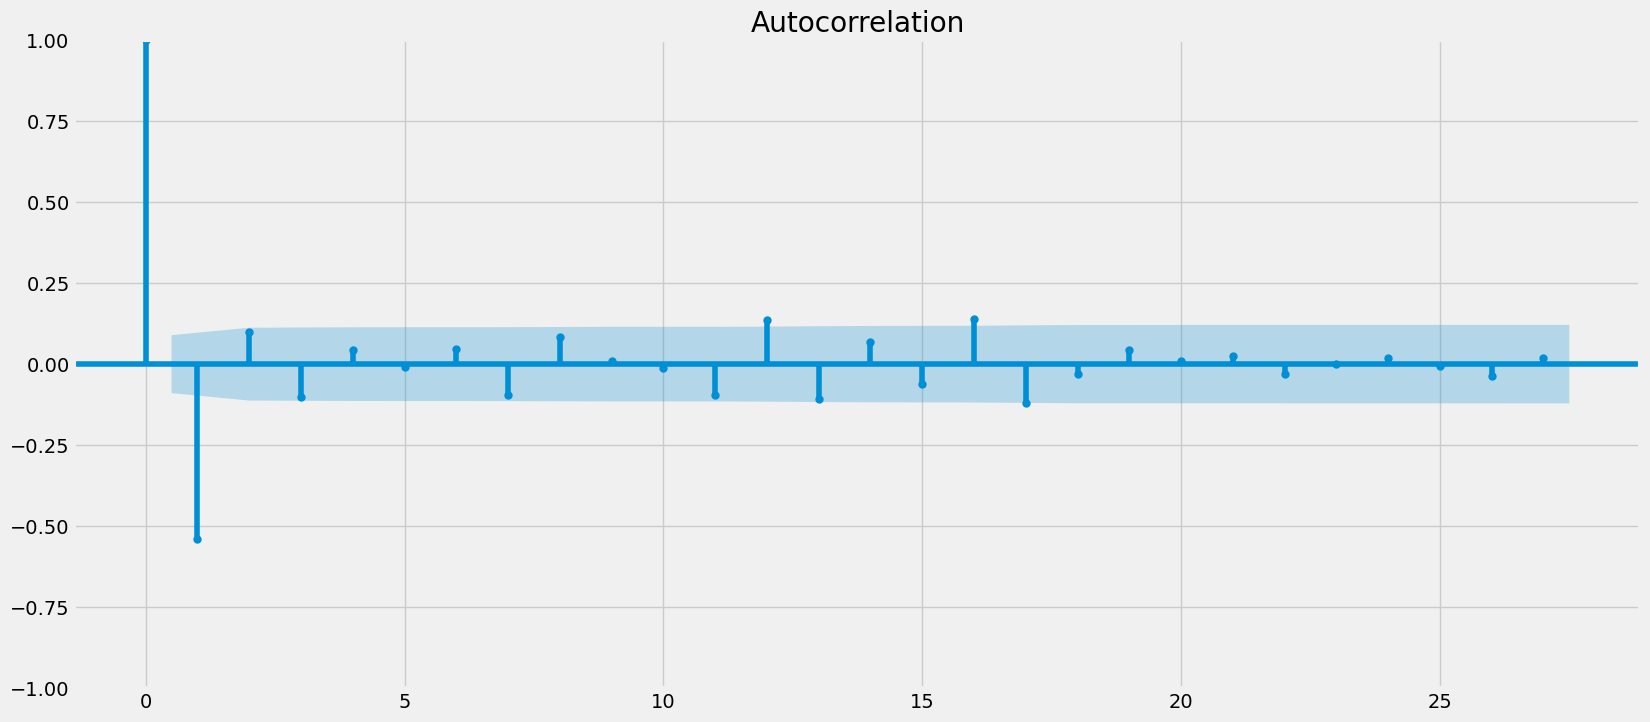

In [83]:
plot_acf(data_diff)
plt.show()

While the autocorrelation plot has shown improvement with fewer autocorrelated terms, it is not flawless. The Dickey-Fuller test confirms the data's stationarity. I will conclude the analysis as there are very few lags above the blue confidence line.
